In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Leer el archivo CSV
csv_file = "/content/drive/MyDrive/Visión por computador/MangoMass/Harumanis_mango_weight.csv"
data = pd.read_csv(csv_file)

# Leer el directorio de las imágenes
image_dir = "/content/drive/MyDrive/Visión por computador/MangoMass/images"

# Calculo los momentos Hu
def calculate_hu_moments(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

# Lista para almacenar los momentos Hu y los pesos
hu_moments_list = []
weights_list = []

# Iterar sobre el dataframe y calcular los momentos Hu para cada imagen
for index, row in data.iterrows():
    image_path = os.path.join(image_dir, row['no'])
    if os.path.exists(image_path):
        hu_moments = calculate_hu_moments(image_path)
        hu_moments_list.append(hu_moments)
        weights_list.append(row['weight'])

# Listas a matrices numpy
X = np.array(hu_moments_list)
y = np.array(weights_list)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Evaluación el modelo
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("RMSE en el conjunto de entrenamiento:", train_rmse)
print("RMSE en el conjunto de prueba:", test_rmse)


RMSE en el conjunto de entrenamiento: 0.07501350106950612
RMSE en el conjunto de prueba: 0.07920832508448562


In [3]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Leer el archivo CSV
csv_file = "/content/drive/MyDrive/Visión por computador/MangoMass/Harumanis_mango_weight.csv"
data = pd.read_csv(csv_file)

# Directorio de las imágenes
image_dir = "/content/drive/MyDrive/Visión por computador/MangoMass/images"

# Cálculo los momentos Hu
def calculate_hu_moments(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

# Crear una lista para almacenar los momentos Hu y los pesos correspondientes
hu_moments_list = []
weights_list = []

# Iterar sobre el dataframe y calcular los momentos Hu para cada imagen
for index, row in data.iterrows():
    image_path = os.path.join(image_dir, row['no'])
    if os.path.exists(image_path):
        hu_moments = calculate_hu_moments(image_path)
        hu_moments_list.append(hu_moments)
        weights_list.append(row['weight'])
    else:
        print("Imagen no encontrada:", row['no'])

# Convertir las listas a matrices numpy
X = np.array(hu_moments_list)
y = np.array(weights_list)

print("Número de imágenes procesadas:", len(X))

# División los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo
model.fit(X_train, y_train)

print("Modelo entrenado con éxito.")

# Evaluación del modelo
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("RMSE en el conjunto de entrenamiento:", train_rmse)
print("RMSE en el conjunto de prueba:", test_rmse)


Número de imágenes procesadas: 546
Tamaño del conjunto de entrenamiento: 436
Tamaño del conjunto de prueba: 110
Modelo entrenado con éxito.
RMSE en el conjunto de entrenamiento: 0.07501350106950612
RMSE en el conjunto de prueba: 0.07920832508448562


Número de imágenes procesadas: 546
Tamaño del conjunto de entrenamiento: 436
Tamaño del conjunto de prueba: 110
Modelo entrenado con éxito.
RMSE en el conjunto de entrenamiento: 0.07501350106950612
RMSE en el conjunto de prueba: 0.07920832508448562


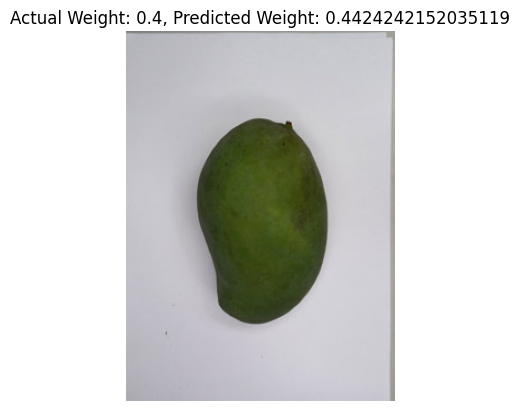

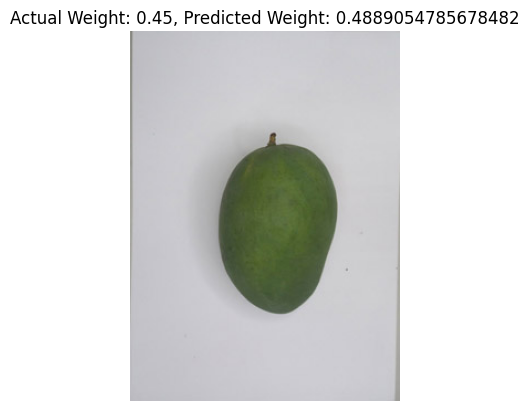

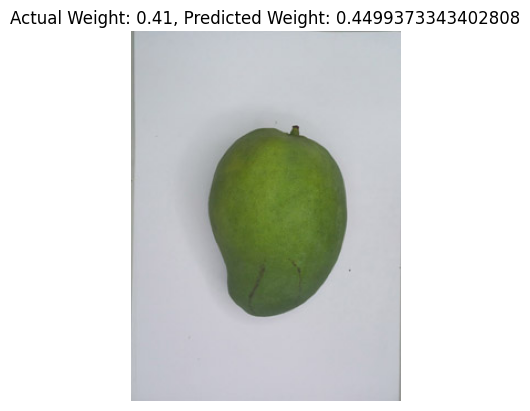

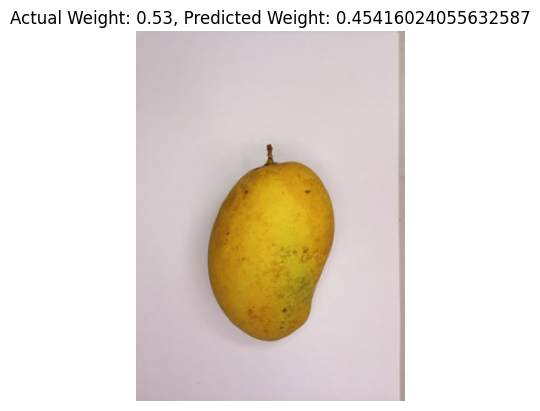

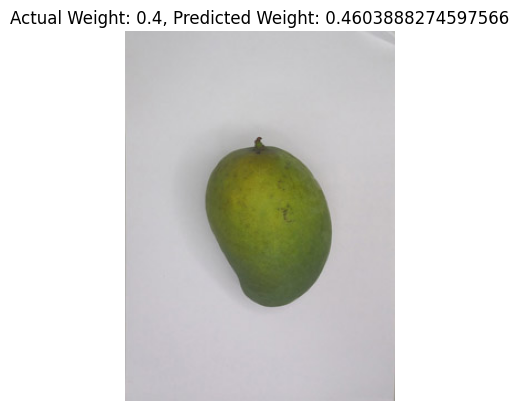

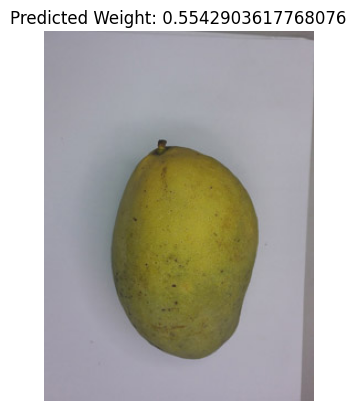

In [5]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Leer el archivo CSV
csv_file = "/content/drive/MyDrive/Visión por computador/MangoMass/Harumanis_mango_weight.csv"
data = pd.read_csv(csv_file)

# Directorio de las imágenes
image_dir = "/content/drive/MyDrive/Visión por computador/MangoMass/images"

# Cálculo de los momentos Hu
def calculate_hu_moments(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

# Lista para almacenar los momentos Hu y los pesos
hu_moments_list = []
weights_list = []

# Iterar sobre el dataframe y calcular los momentos Hu para cada imagen
for index, row in data.iterrows():
    image_path = os.path.join(image_dir, row['no'])
    if os.path.exists(image_path):
        hu_moments = calculate_hu_moments(image_path)
        hu_moments_list.append(hu_moments)
        weights_list.append(row['weight'])
    else:
        print("Imagen no encontrada:", row['no'])

# Listas a matrices numpy
X = np.array(hu_moments_list)
y = np.array(weights_list)

print("Número de imágenes procesadas:", len(X))

# Dividisión los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo
model.fit(X_train, y_train)

print("Modelo entrenado con éxito.")

# Evaluación del modelo
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("RMSE en el conjunto de entrenamiento:", train_rmse)
print("RMSE en el conjunto de prueba:", test_rmse)

# Imágenes de entrenamiento con los pesos reales y predichos
num_images_to_show = 5
selected_indices = np.random.choice(len(X_train), num_images_to_show, replace=False)

for idx in selected_indices:
    hu_moments = X_train[idx]
    weight_actual = y_train[idx]
    weight_predicted = model.predict([hu_moments])[0]
    image_path = os.path.join(image_dir, data.iloc[idx]['no'])
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Actual Weight: {weight_actual}, Predicted Weight: {weight_predicted}")
    plt.axis('off')
    plt.show()

# Test en una nueva imagen de mango
def predict_weight_for_new_image(image_path):
    hu_moments = calculate_hu_moments(image_path)
    weight_predicted = model.predict([hu_moments])[0]
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Weight: {weight_predicted}")
    plt.axis('off')
    plt.show()

# Ejemplo para una nueva imagen de mango
new_image_path = "/content/drive/MyDrive/Visión por computador/MangoMass/images/108a.jpg"
predict_weight_for_new_image(new_image_path)


In [6]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [7]:
csv_file = "/content/drive/MyDrive/Visión por computador/MangoMass/Harumanis_mango_weight.csv"
data = pd.read_csv(csv_file)

image_dir = "/content/drive/MyDrive/Visión por computador/MangoMass/images"

def calculate_hu_moments(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments


In [8]:
hu_moments_list = []
weights_list = []

for index, row in data.iterrows():
    image_path = os.path.join(image_dir, row['no'])
    if os.path.exists(image_path):
        hu_moments = calculate_hu_moments(image_path)
        hu_moments_list.append(hu_moments)
        weights_list.append(row['weight'])
    else:
        print("Imagen no encontrada:", row['no'])

X = np.array(hu_moments_list)
y = np.array(weights_list)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Modelo entrenado con éxito.
RMSE en el conjunto de entrenamiento: 0.07501350106950612
RMSE en el conjunto de prueba: 0.07920832508448562


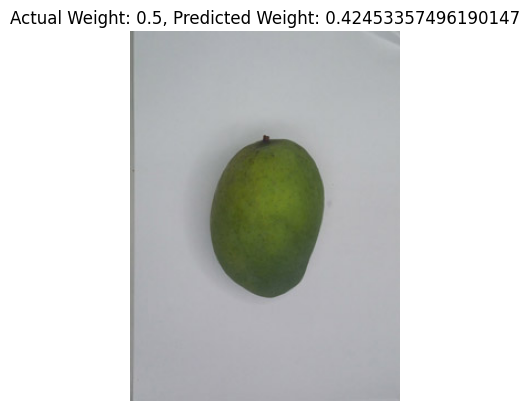

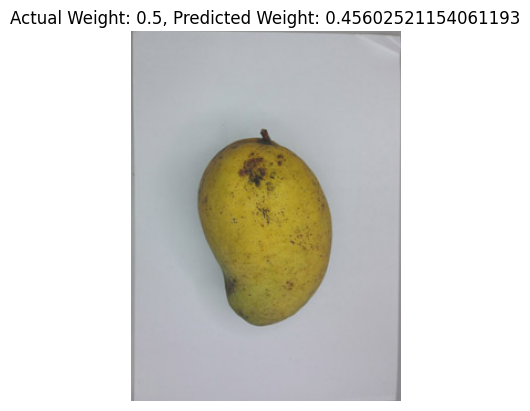

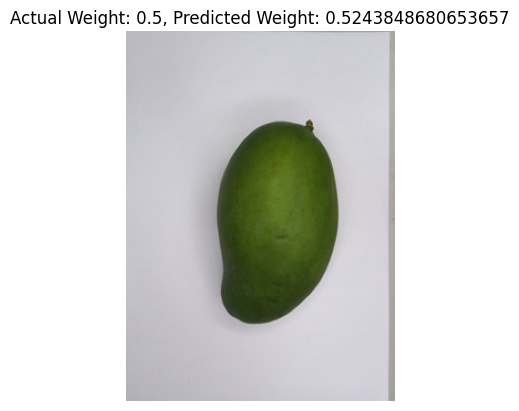

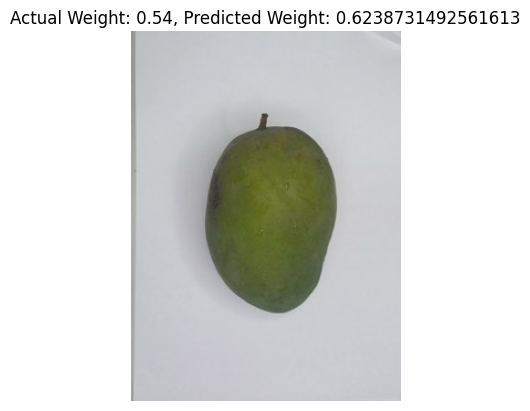

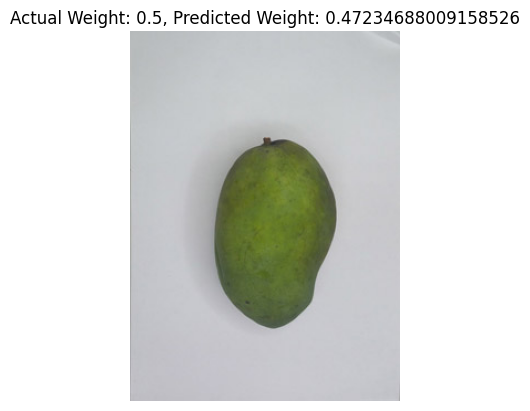

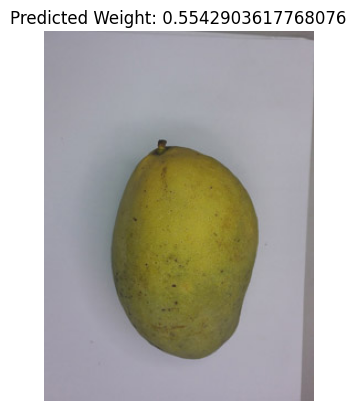

In [10]:
model = LinearRegression()

# Entrenamiento el modelo
model.fit(X_train, y_train)

print("Modelo entrenado con éxito.")

# Evaluación del modelo
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("RMSE en el conjunto de entrenamiento:", train_rmse)
print("RMSE en el conjunto de prueba:", test_rmse)

# Imágenes de entrenamiento con sus pesos reales y predichos
num_images_to_show = 5
selected_indices = np.random.choice(len(X_train), num_images_to_show, replace=False)

for idx in selected_indices:
    hu_moments = X_train[idx]
    weight_actual = y_train[idx]
    weight_predicted = model.predict([hu_moments])[0]
    image_path = os.path.join(image_dir, data.iloc[idx]['no'])
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Actual Weight: {weight_actual}, Predicted Weight: {weight_predicted}")
    plt.axis('off')
    plt.show()

# Test en una nueva imagen de mango
def predict_weight_for_new_image(image_path):
    hu_moments = calculate_hu_moments(image_path)
    weight_predicted = model.predict([hu_moments])[0]
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Weight: {weight_predicted}")
    plt.axis('off')
    plt.show()

# Ejemplo en una nueva una imagen de mango
new_image_path = "/content/drive/MyDrive/Visión por computador/MangoMass/images/108a.jpg"
predict_weight_for_new_image(new_image_path)


Modelo entrenado con éxito.
RMSE en el conjunto de entrenamiento: 0.075
RMSE en el conjunto de prueba: 0.079


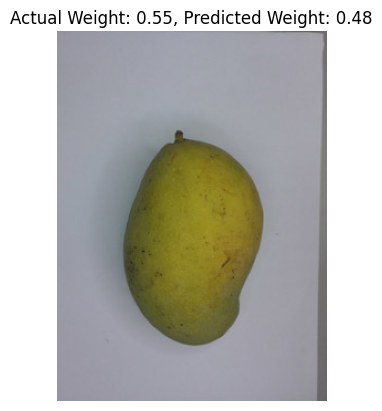

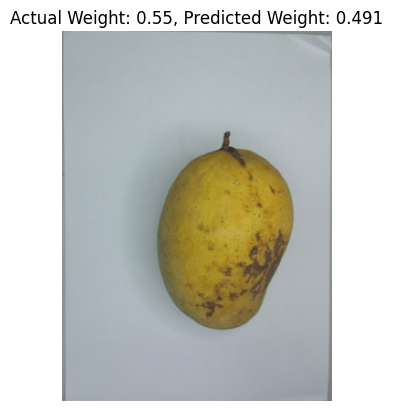

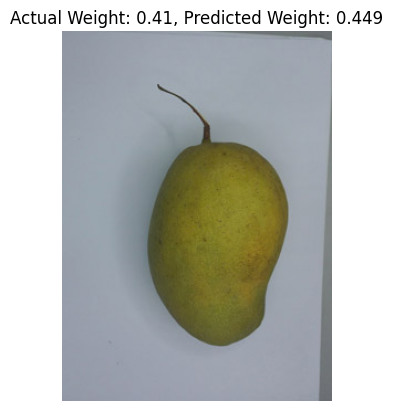

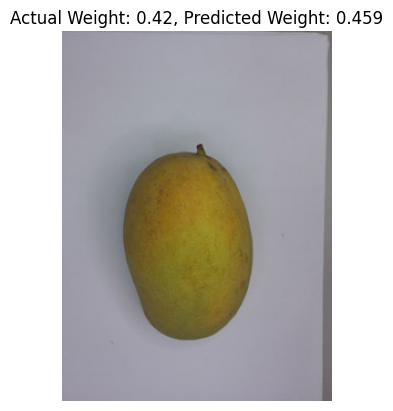

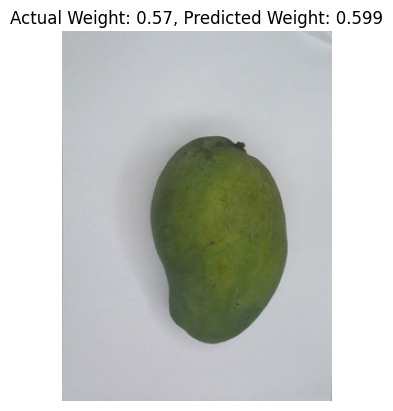

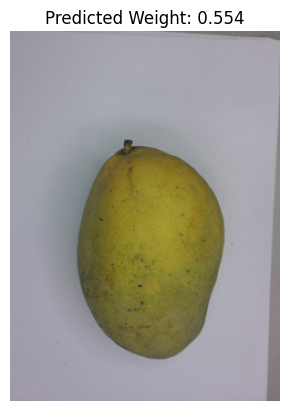

In [11]:
# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo
model.fit(X_train, y_train)

print("Modelo entrenado con éxito.")

# Evaluación del modelo
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("RMSE en el conjunto de entrenamiento:", round(train_rmse, 3))
print("RMSE en el conjunto de prueba:", round(test_rmse, 3))

# Iimágenes de prueba con sus pesos reales y predichos
num_images_to_show = 5
selected_indices = np.random.choice(len(X_test), num_images_to_show, replace=False)

for idx in selected_indices:
    hu_moments = X_test[idx]
    weight_actual = y_test[idx]
    weight_predicted = model.predict([hu_moments])[0]
    image_path = os.path.join(image_dir, data.iloc[idx]['no'])
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Actual Weight: {round(weight_actual, 3)}, Predicted Weight: {round(weight_predicted, 3)}")
    plt.axis('off')
    plt.show()

# Test en una nueva imagen de mango
def predict_weight_for_new_image(image_path):
    hu_moments = calculate_hu_moments(image_path)
    weight_predicted = model.predict([hu_moments])[0]
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Weight: {round(weight_predicted, 3)}")
    plt.axis('off')
    plt.show()

# Ejemplo para una nueva imagen de mango
new_image_path = "/content/drive/MyDrive/Visión por computador/MangoMass/images/108a.jpg"
predict_weight_for_new_image(new_image_path)


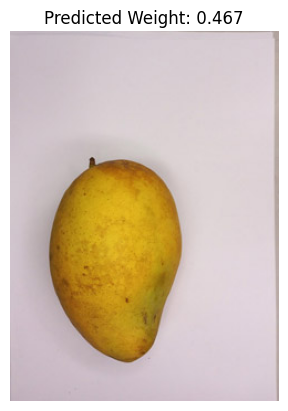

In [ ]:
new_image_path = "/content/drive/MyDrive/Vision por computador/Mango/MangoData/MangoMass/images/248b.jpg"
predict_weight_for_new_image(new_image_path)